In [7]:
# Python에서 일원 분산 분석 실습
# 예제 데이터 생성

import pandas as pd
import numpy as np

# 데이터 입력

scents = ['Lavender', 'Rosemary', 'Peppermint']
minutes_lavender = [10,12,11,9,8,12,11,10,10,11]
minutes_rosemary = [14,15,13,16,14,15,14,13,14,16]
minutes_peppermint = [18,17,18,16,17,19,18,17,18,19]

anova_data = pd.DataFrame({
    'Scent' : np.repeat(scents, 10),
    'Minutes' : minutes_lavender + minutes_rosemary + minutes_peppermint
})
anova_data.head()

,Scent,Minutes
0,Lavender,10
1,Lavender,12
2,Lavender,11
3,Lavender,9
4,Lavender,8


In [ ]:
anova_data.groupby(['Scent']).describe()

Minutes                                              
             count  mean       std   min   25%   50%   75%   max
Scent                                                           
Lavender      10.0  10.4  1.264911   8.0  10.0  10.5  11.0  12.0
Peppermint    10.0  17.7  0.948683  16.0  17.0  18.0  18.0  19.0
Rosemary      10.0  14.4  1.074968  13.0  14.0  14.0  15.0  16.0

In [6]:
from scipy.stats import f_oneway

# 각 그룹의 데이터를 추출
lavender = anova_data[anova_data['Scent'] == 'Lavender']['Minutes']
rosemary = anova_data[anova_data['Scent'] == 'Rosemary']['Minutes']
peppermint = anova_data[anova_data['Scent'] == 'Peppermint']['Minutes']

# 일원 분산분석(One-way ANOVA) 수행
f_statistic, p_value = f_oneway(lavender,rosemary,peppermint)
print(f'F-statistic: {f_statistic}, p-value: {p_value}')

F-statistic: 109.66869300911841, p-value: 1.0908156984152117e-13


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 모델 적합
model = ols('Minutes ~ C(Scent)', data = anova_data).fit()

# ANOVA 수행하기
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

              sum_sq    df           F        PR(>F)
C(Scent)  267.266667   2.0  109.668693  1.090816e-13
Residual   32.900000  27.0         NaN           NaN


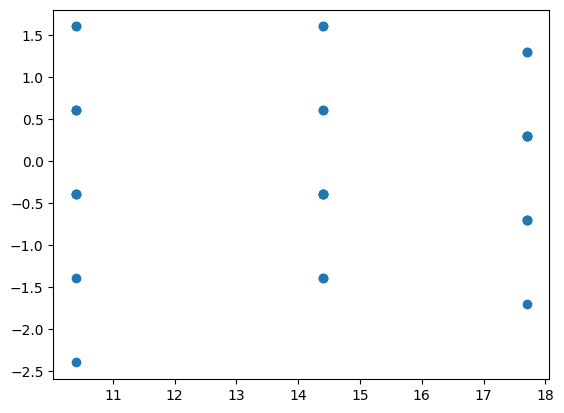

In [9]:
import matplotlib.pyplot as plt

plt.scatter(model.fittedvalues, model.resid)
plt.show()

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-2.4, -1.7, -1.4, -1.4, -1.4, -0.7, -0.7, -0.7, -0.4, -0.4, -0.4,
         -0.4, -0.4, -0.4, -0.4,  0.3,  0.3,  0.3,  0.3,  0.6,  0.6,  0.6,
          0.6,  0.6,  1.3,  1.3,  1.6,  1.6,  1.6,  1.6])),
 (np.float64(1.0835879309588157),
  np.float64(-7.873989863690692e-15),
  np.float64(0.9788701263310985)))

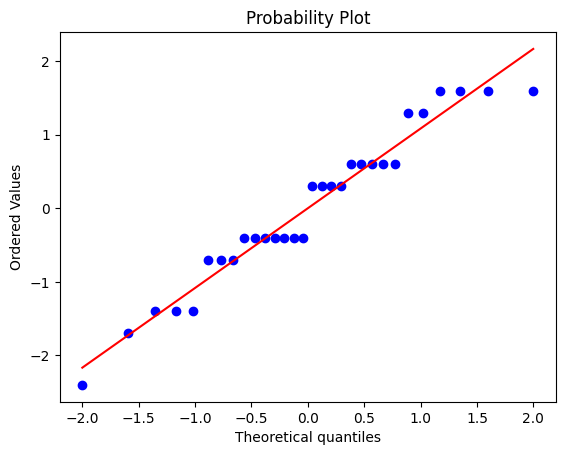

In [10]:
import scipy.stats as sp
sp.probplot(model.resid, dist = 'norm', plot=plt)

In [11]:
W, p = sp.shapiro(model.resid)
print(f'검정통계량: {W: .3f}, 유의확률: {p: .3f}')

검정통계량:  0.950, 유의확률:  0.168


In [14]:
# 등분산성 검정

from scipy.stats import bartlett

groups = ['Lavender', 'Rosemary', 'Peppermint']
grouped_residuals = [model.resid[anova_data['Scent'] == group] for group in groups]

test_statistic, p_value = bartlett(*grouped_residuals)
print(f'검정통계량: {test_statistic}, p-value: {p_value}')

검정통계량: 0.7177050704181149, p-value: 0.6984773445730457


In [15]:
# Python에서의 사후 검정 실습

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후 검정
tukey = pairwise_tukeyhsd(endog = anova_data['Minutes'],
                          groups = anova_data['Scent'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
  Lavender Peppermint      7.3   0.0  6.076  8.524   True
  Lavender   Rosemary      4.0   0.0  2.776  5.224   True
Peppermint   Rosemary     -3.3   0.0 -4.524 -2.076   True
---------------------------------------------------------
